# 第5章: 係り受け解析
日本語Wikipediaの「人工知能」に関する記事からテキスト部分を抜き出したファイルがai.ja.zipに収録されている． この文章をCaboChaやKNP等のツールを利用して係り受け解析を行い，その結果をai.ja.txt.parsedというファイルに保存せよ．このファイルを読み込み，以下の問に対応するプログラムを実装せよ．

In [2]:
#!unzip ai.ja.zip
#!cabocha -f1ai.ja.txt > ai_ja_cabocha.txt

# 40.係り受け解析結果の読み込み（形態素）
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

In [259]:
class Morph():
    def __init__(self, l):
        info = l[1].split(',')
        self.surface = l[0]
        self.base = info[6]
        self.pos = info[0]
        self.pos1 = info[1]
    def __str__(self):
        #return f'{self.surface} ({self.base}/{self.pos}/{self.pos1})'
        return f'{self.surface}'

In [260]:
!head -n 10 /Users/seiya.k/workspace/100knock-2020/SeiyaKikuchi/chapter05/work/ai_ja_cabocha.txt

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS
* 0 17D 1/1 0.388993
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
* 1 17D 2/3 0.613549
（	記号,括弧開,*,*,*,*,（,（,（


In [261]:
path = "/Users/seiya.k/workspace/100knock-2020/SeiyaKikuchi/chapter05/work/ai_ja_cabocha.txt"

In [262]:
sentences = []
with open(path) as f:
    sentence = []
    
    for l in f:
        l = l.strip().split('\t')
        if len(l) == 1:
            if l[0] == 'EOS':
                sentences.append(sentence)
                sentence = []
        else:
            morph = Morph(l)
            sentence.append(morph)

from pprint import pprint
pprint([str(m) for m in sentences[2]])

['人工',
 '知能',
 '（',
 'じん',
 'こうち',
 'のう',
 '、',
 '、',
 'AI',
 '〈',
 'エーアイ',
 '〉',
 '）',
 'と',
 'は',
 '、',
 '「',
 '『',
 '計算',
 '（',
 '）',
 '』',
 'という',
 '概念',
 'と',
 '『',
 'コンピュータ',
 '（',
 '）',
 '』',
 'という',
 '道具',
 'を',
 '用い',
 'て',
 '『',
 '知能',
 '』',
 'を',
 '研究',
 'する',
 '計算',
 '機',
 '科学',
 '（',
 '）',
 'の',
 '一',
 '分野',
 '」',
 'を',
 '指す',
 '語',
 '。',
 '「',
 '言語',
 'の',
 '理解',
 'や',
 '推論',
 '、',
 '問題',
 '解決',
 'など',
 'の',
 '知的',
 '行動',
 'を',
 '人間',
 'に',
 '代わっ',
 'て',
 'コンピューター',
 'に',
 '行わ',
 'せる',
 '技術',
 '」',
 '、',
 'または',
 '、',
 '「',
 '計算',
 '機',
 '（',
 'コンピュータ',
 '）',
 'による',
 '知的',
 'な',
 '情報処理',
 'システム',
 'の',
 '設計',
 'や',
 '実現',
 'に関する',
 '研究',
 '分野',
 '」',
 'と',
 'も',
 'さ',
 'れる',
 '。']


# 41.係り受け解析結果の読み込み（文節・係り受け）
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．

In [263]:
class Chunk():
    def __init__(self, morphs, dst, srcs, idx):
        self.morphs = morphs
        self.dst = dst
        self.srcs = srcs
        self.idx = idx
    def __str__(self):
        return ''.join([str(m) for m in self.morphs])
        #+ ' ' + str(self.dst) + '/' + str(self.srcs) + '/' + str(self.idx)
        #return f'{self.morphs} (d:{self.dst}/s:{self.srcs})'
    def return_m_list(self):
        return list([str(m) for m in self.morphs])
    

In [264]:
from itertools import groupby

sentences_q41 = []
with open(path) as f:
    morphs = []
    sentence = []
    dsts = []
    dst, srcs = -999, -999
    
    for l in f:
        l = l.strip().split('\t')
        
        if l[0] == 'EOS':
            if dst != -999 and srcs != -999:
                chunk = Chunk(morphs, dst, srcs, chunk_id)
                sentence.append(chunk)
                morphs = []
                dst, srcs = 999, 999
            if sentence == []:
                pass
            sentences_q41.append(sentence)
            sentence = []
            #print(dsts)
            dsts = []
                
        elif len(l[0].split(' ')) == 5:
            if morphs != [] and dst != 999 and srcs != 999:
                chunk = Chunk(morphs, dst, srcs, chunk_id)
                sentence.append(chunk)
                morphs = []
                dst, srcs = -999, -999
                
            nums = l[0].split(' ')
            dst, chunk_id = int(nums[2][:-1]), int(nums[1])
            dsts.append(dst)
            
            srcs = []
            for i, d in enumerate(dsts, 1):
                if chunk_id == d:
                    srcs.append(i)                
                        
        else:
            morph = Morph(l)
            morphs.append(morph)
            
from pprint import pprint
pprint(([str(c) for c in sentences_q41[2]]))

['人工知能',
 '（じんこうちのう、、',
 'AI',
 '〈エーアイ〉）とは、',
 '「『計算',
 '（）』という',
 '概念と',
 '『コンピュータ',
 '（）』という',
 '道具を',
 '用いて',
 '『知能』を',
 '研究する',
 '計算機科学',
 '（）の',
 '一分野」を',
 '指す',
 '語。',
 '「言語の',
 '理解や',
 '推論、',
 '問題解決などの',
 '知的行動を',
 '人間に',
 '代わって',
 'コンピューターに',
 '行わせる',
 '技術」、または、',
 '「計算機',
 '（コンピュータ）による',
 '知的な',
 '情報処理システムの',
 '設計や',
 '実現に関する',
 '研究分野」とも',
 'される。']


### 今回の処理結果はgroupbyを使えば「１文あたり」のイテレータにできる
### Chunkのself.morphs部分をMorphから継承すればいいじゃないか
### infoをsplitしてMorphに格納する処理はクラス内に収めてしまえ
### デフォルト値を設定するメソッドとかありそう...（マイナスの値にすること）

# 42.係り元と係り先の文節の表示
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [9]:
id_text_pair = [(i, c) for i, c in enumerate(sentences_q41[2])]

for c in sentences_q41[2]:
    for pair in id_text_pair:
        if c.dst == pair[0]:
            print(f'{c}\t{pair[1]}')

人工知能	語。
（じんこうちのう、、	語。
AI	〈エーアイ〉）とは、
〈エーアイ〉）とは、	語。
「『計算	（）』という
（）』という	道具を
概念と	道具を
『コンピュータ	（）』という
（）』という	道具を
道具を	用いて
用いて	研究する
『知能』を	研究する
研究する	計算機科学
計算機科学	（）の
（）の	一分野」を
一分野」を	指す
指す	語。
語。	研究分野」とも
「言語の	推論、
理解や	推論、
推論、	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術」、または、
技術」、または、	研究分野」とも
「計算機	（コンピュータ）による
（コンピュータ）による	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野」とも
研究分野」とも	される。


### 句読点は出力しない(関数を追加しないと)
### 文節にidを振る処理はQ41で済ませてしまっていい
### 1文字変数の使用はfor文内に留め、なるべく意味のある変数名を使うこと

# 43.名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [10]:
id_text_pair = [(i, c) for i, c in enumerate(sentences_q41[2])]

for c in sentences_q41[2]:
    if any([m.pos == '名詞' for m in c.morphs]):
        for pair in id_text_pair:
            if c.dst == pair[0]:
                if any([m.pos == '動詞' for m in pair[1].morphs]):
                    print(f'{c}\t{pair[1]}')

道具を	用いて
『知能』を	研究する
一分野」を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野」とも	される。


# 44.係り受け木の可視化
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい．

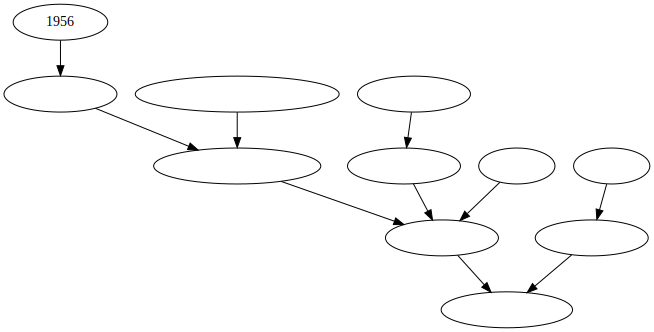

In [489]:
from graphviz import Digraph
dot = Digraph(comment='chunk tree')

id_text_pair = [(i, c) for i, c in enumerate(sentences_q41[26])]

for c in sentences_q41[26]:
    for pair in id_text_pair:
        
        if c.dst == pair[0]:
            # nodeに随時ラベルを貼らないと、同じ文字表記の文節を同じnodeとして扱ってしまう。
            dot.node(str(c))
            dot.node(str(pair[1]))
            dot.edge(str(c), str(pair[1]))

# print(dot.source) 
# dot.render('/Users/seiya.k/workspace/100knock-2020/SeiyaKikuchi/chapter05/work/graph_q44.gv', view=True)
dot

### nodeに随時ラベルを貼らないと、同じ文字表記の文節を同じnodeとして扱ってしまう。(「という」が１つのnodeにまとまっている)

### 45.動詞の格パターンの抽出  
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

動詞を含む文節において，最左の動詞の基本形を述語とする  
述語に係る助詞を格とする  
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる  
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

作り出す	で は を  
このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

コーパス中で頻出する述語と格パターンの組み合わせ
「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [36]:
new_file = 'work/Q45_corpus.txt'

with open(new_file,"w") as f:
    for sentence in sentences_q41:
        for c in sentence:
            if any([m.pos == '動詞' for m in c.morphs]) and c.srcs != []:
                case = ''
                for src in c.srcs:
                    for m in sentence[src].morphs:
                        if m.pos == '助詞':
                            case += m.base + ' '
                if case != '':
                    for m in c.morphs:
                        if m.pos == '動詞':
                            f.write(m.base + '\t')
                            f.write(case + '\n')
                            break

In [37]:
!head -n 5 work/Q45_corpus.txt

用いる	て 
する	を 
代わる	に て 
行う	に 
述べる	の の に て 


In [38]:
!sort work/Q45_corpus.txt | uniq -c | sort -r | head -n 5

  16 する	の 
  16 する	て 
  14 する	に 
   8 する	の て 
   8 する	を 


In [39]:
!grep "^行う\t" work/Q45_corpus.txt | sort | uniq -c | sort -r | head -n 5

   3 行う	に を 
   3 行う	て 
   2 行う	を て 
   1 行う	など 
   1 行う	が という 


In [40]:
!grep "^なる\t" work/Q45_corpus.txt | sort | uniq -c | sort -r | head -n 5

   4 なる	と 
   2 なる	の 
   1 なる	に関する が を と て 
   1 なる	にとって と 
   1 なる	から で は が の 


In [41]:
!grep "^与える\t" work/Q45_corpus.txt | sort | uniq -c | sort -r | head -n 5

   1 与える	など に 
   1 与える	に として も 
   1 与える	の を 


### 46.動詞の格フレーム情報の抽出  
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）  
述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる  
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

作り出す	で は を	会議で ジョンマッカーシーは 用語を

In [42]:
new_file = 'work/Q46.txt'

with open(new_file,"w") as f:
    for sentence in sentences_q41:
        for c in sentence:
            if any([m.pos == '動詞' for m in c.morphs]) and c.srcs != []:
                case = ''
                para = ''
                for src in c.srcs:
                    para += str(sentence[src]) + ' '
                    for m in sentence[src].morphs:
                        if m.pos == '助詞':
                            case += m.base + ' '
                if case != '':
                    for m in c.morphs:
                        if m.pos == '動詞':
                            f.write(m.base + '\t' + case + para + '\n')
                            break

In [43]:
!head work/Q46.txt

用いる	て 用いて 
する	を 『知能』を 研究する 
代わる	に て 人間に 代わって 
行う	に コンピューターに 行わせる 
述べる	の の に て 情報工学者・通信工学者の 次のように 述べている。 
する	で コンピュータ上で 実現する、 
する	て 解析して 
する	の たり 特定の 検出・抽出したりする 
ある	は 応用例は 自然言語処理 ある。 
する	に で により 1956年に ダートマス会議で ジョン・マッカーシーにより 命名された。 


### 項を辞書順にsortしてない
### 空文字列""を条件節に持ってくるのはあんまり見ない。空リストはアリ

# 47.機能動詞構文のマイニング  
動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる  
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）  
例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．  

学習を行う	に を	元に 経験を

In [182]:
new_file = 'work/Q47.txt'

with open(new_file,"w") as f:
    for sentence in sentences_q41:
        for c in sentence:
            if any([m.pos == '動詞' for m in c.morphs]) and c.srcs != []:
                predicate = []
                para_and_case = dict()
                for src in c.srcs:
                    for i, m in enumerate(sentence[src].morphs):
                        if m.pos == '助詞':
                            para_and_case[str(sentence[src])] = str(sentence[src].morphs[i].base)
                        elif m.pos１ == 'サ変接続' and sentence[src].morphs[i-1].surface == 'を':
                            predicate.extend(m.base + sentence[src].morphs[i-1].base)
                if predicate != []:
                    for m in c.morphs:
                        if m.pos == '動詞':
                            predicate.extend(m.base)
                            sorted_dic = sorted(para_and_case.items(), key=lambda x: x[0])
                            f.write(''.join(predicate) + '\t'+ ' '.join([t[1] for t in sorted_dic]) + '\t'+ ' '.join([str(t[0]) for t in sorted_dic]) + '\n')
                            para_and_case = None
                            break

In [183]:
!head -n 30 work/Q47.txt

注目を集める	が を	「サポートベクターマシン」が 注目を
学習を行う	に を	元に 学習を
統計をする	は の や に を	ACT-Rでは、 エキスパートの ニューラルネットワークや 元に 統計的学習を
プログラミングをする	を は	プログラミング言語を 彼はまた
プログラミングをする	は を と	アラン・カルメラウアーは プログラミング言語を マービン・ミンスキーと
処理を行う	を	処理を
意味をする	て を	付加して、 意味を
運転をする	を	運転を
運転をする	に を	柔軟に 運転を
開発をある	の の を	人間の 従来の 開発工数を
表現をする	を として	表現する）を （ファジィルールとして
研究を続ける	に を が	実現に 研究を 続けているが、
共同を始める	の を て	ドイツの 共同研究を 始めており、
投資をする	を を	20億ドルを 投資を
反乱を起こす	に対して を	人間に対して 反乱を
監視を行う	と に を	ネット検閲と 人工知能に 監視を
監視をする	と に と を は	中国本土と 市民に 次々と 監視カメラを 香港では、
戦争をなる	の の を の	なるとの 大国間の 戦争を 軍の
追及を受ける	が は を に を	Googleが アメリカでは 人工知能を 同様に 追及を
解任をする	は は を	Google社員らは 倫理委員会には 解任を
議論を行う	て を	行ってきました。 議論を


# 48.名詞から根へのパスの抽出
文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

各文節は（表層形の）形態素列で表現する  
パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する  
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．  

ジョンマッカーシーは -> 作り出した  
AIに関する -> 最初の -> 会議で -> 作り出した  
最初の -> 会議で -> 作り出した  
会議で -> 作り出した  
人工知能という -> 用語を -> 作り出した  
用語を -> 作り出した  
KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．  

ジョンマッカーシーは -> 作り出した  
ＡＩに -> 関する -> 会議で -> 作り出した  
会議で -> 作り出した  
人工知能と -> いう -> 用語を -> 作り出した  
用語を -> 作り出した  

In [514]:
sentence = sentences_q41[26]
for c in sentence:
    if any([m.pos == '名詞' for m in c.morphs]):
        path_q48 = [str(c)]
        dst = c.dst
        while dst != -1:
            path_q48.append(' -> ' + str(sentence[dst]))
            dst = sentence[dst].dst
        print(''.join(path_q48))

1956年に -> 行われた、 -> 提案書において、 -> 使用され、 -> 創立された。
ダートマス会議開催の -> 提案書において、 -> 使用され、 -> 創立された。
提案書において、 -> 使用され、 -> 創立された。
人類史上、 -> 用語として -> 使用され、 -> 創立された。
用語として -> 使用され、 -> 創立された。
使用され、 -> 創立された。
新たな -> 分野として -> 創立された。
分野として -> 創立された。
創立された。


# 49.名詞間の係り受けパスの抽出
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がiとj（i<j）のとき，係り受けパスは以下の仕様を満たすものとする．  

問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する  
文節iとjに含まれる名詞句はそれぞれ，XとYに置換する  
また，係り受けパスの形状は，以下の2通りが考えられる．  

文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示  
上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示  
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．  

In [500]:
def create_pair_of_noun_phrase(sentence):
    noun_phrases = []
    for c in sentence:
        if any([m.pos == '名詞' for m in c.morphs]):
            noun_phrases.append(c)
            #noun_phrases.append(str(c))
    np_pairs = itertools.combinations(noun_phrases, 2)
    #print([i for i in np_pairs])
    return np_pairs

In [503]:
def change_noun_to_X(chunk):
    new_np = []
    first = True
    for m in chunk.morphs:
        if m.pos == '名詞':
            if first:
                new_np.append('X')
                first = False
            else:
                new_np.append(str(m))
        else:
            new_np.append(str(m))
    new_np = ''.join(new_np)
    return new_np

def change_noun_to_Y(chunk):
    new_np = []
    first = True
    for m in chunk.morphs:
        if m.pos == '名詞':
            if first:
                new_np.append('Y')
                first = False
            else:
                new_np.append(str(m))
        else:
            new_np.append(str(m))
    new_np = ''.join(new_np)
    return new_np

In [542]:
import itertools
sentence = sentences_q41[4]
noun_phrases = []

print(''.join([str(c) for c in sentence]) + '\n' + '--------------')

for pair in create_pair_of_noun_phrase(sentence):
    #print(str(pair[0]), pair[0].idx, str(pair[1]), pair[1].idx)
    print(' #', str(pair[0]), '->', str(pair[1]))
    
    path_q49 = [change_noun_to_X(pair[0])]
    dst = pair[0].dst
    first = True
    
    while dst != -1:
        
        if dst > pair[1].idx and first:
            path_q49.append(' | ' + change_noun_to_Y(pair[1]))
            branched_dst = pair[1].dst
            
            while branched_dst != dst:
                path_q49.append(' -> ' + str(sentence[branched_dst]))
                branched_dst = sentence[branched_dst].dst
                
            path_q49.append(' | ')
            dst = branched_dst
            first = False
                            
        elif dst == pair[1].idx:
            path_q49.append(' -> ' + change_noun_to_Y(sentence[dst]))
            dst = sentence[dst].dst
            break
            
        path_q49.append(' -> ' + str(sentence[dst]))
        dst = sentence[dst].dst
            
    print(''.join(path_q49))

『日本大百科全書(ニッポニカ)』の解説で、情報工学者・通信工学者の佐藤理史は次のように述べている。
--------------
 # 『日本大百科全書(ニッポニカ)』の -> 解説で、
『X大百科全書(ニッポニカ)』の -> Yで、
 # 『日本大百科全書(ニッポニカ)』の -> 情報工学者・通信工学者の
『X大百科全書(ニッポニカ)』の -> 解説で、 | Y工学者・通信工学者の -> 佐藤理史は |  -> 述べている。
 # 『日本大百科全書(ニッポニカ)』の -> 佐藤理史は
『X大百科全書(ニッポニカ)』の -> 解説で、 | Y理史は |  -> 述べている。
 # 『日本大百科全書(ニッポニカ)』の -> 次のように
『X大百科全書(ニッポニカ)』の -> 解説で、 | Yのように |  -> 述べている。
 # 解説で、 -> 情報工学者・通信工学者の
Xで、 | Y工学者・通信工学者の -> 佐藤理史は |  -> 述べている。
 # 解説で、 -> 佐藤理史は
Xで、 | Y理史は |  -> 述べている。
 # 解説で、 -> 次のように
Xで、 | Yのように |  -> 述べている。
 # 情報工学者・通信工学者の -> 佐藤理史は
X工学者・通信工学者の -> Y理史は
 # 情報工学者・通信工学者の -> 次のように
X工学者・通信工学者の -> 佐藤理史は | Yのように |  -> 述べている。
 # 佐藤理史は -> 次のように
X理史は | Yのように |  -> 述べている。
